In [3]:
## Homework #1 DATA 445 Due Sept 10, 2021

In [4]:
## Q1 What type of algorithm would you use to segment a company customers 
## database into multiple groups?

## A clustering algorithm would be able to divide the customers in the database into multiple 
## groups. If the groups (categories) are already known, this could be done as a semi-supervised
## learning task by labeling a subset of the data correctly. If the groups are not already known,
## a model would need a training data set to identify possible groups.

In [5]:
## Q2 Would you frame the problem of spam detection as a supervised learning problem or an 
## unsupervised learning problem? Explain.

## It is probably a semi-supervised learning task, with an initial phase being supervised and 
## the model then being unsupervised in the future. Incremental learning is one way for a model
## to "learn" what constitutes spam. Often the initial screening for spam comes from a list of 
## keywords from the software being used or the ISP. The user then provides "corrections" to the 
## model to help it be more accurate. But over time, the model hopefully gets better at identifying
## spam and can then start learning unsupervised.

In [6]:
## Q3 What is a test set, and why would you want to use it?

## A test set is a set of data that is held back when training a model. The model learns on the "train"
## set (without the "test" data). You can then check the quality of the model by asking it to predict on the "test" data set.
## The more accurate the prediction compared to the known result, the better the model is.

In [7]:
## Q4 You are training a classification model with 100 variables/features that achieves 95% 
## accuracy in the training dataset. However, when you run it in the test dataset, you only 
## get 60% accuracy. Which of the following options are valid approached to solve this problem?

## (a) reduce the number of input variables/features

## A large decrease is accuracy from train to test is seen most commonly when there is 
## overfitting of the model. Reducing the number of input features will help with this. The 
## other possiblity is that the data is not randomly split, and so the train and test data
## have marked differences.


In [8]:
## Q5a Using the pandas library, read the csv data file and create a data-frame called house_price.

import pandas as pd
import boto3

## Defining the S3 bucket
s3 = boto3.resource('s3')
bucket_name = 'bonnieh-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

##R Reading the csv file
house_price = pd.read_csv(file_content_stream)
house_price

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [9]:
## 5b Drop the No and transaction date columns.

house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [10]:
## Q5c Split the data-frame into two data-frames: train (80%) and test (20%).

from sklearn.model_selection import train_test_split

## selecting the input and target variables

X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

## splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [12]:
## Q5d Using the train data-frame, build a linear regression model in which: house age, 
## distance to the nearest MRT station, number of convenience stores, latitude, and 
## longitude are the input variables, and house price of unit area is the target variable. 
## After the model is built, predict the house price of unit area of a the houses in the 
## test data-frame. Report the MSE.

from sklearn.linear_model import LinearRegression

## building the linear regression model
lm_md = LinearRegression().fit(X_train, Y_train)
lm_md.coef_

## importing numpy

import numpy as np

preds = lm_md.predict(X_test)
preds

## computing the mean square error (MSE)

mse = np.mean(np.power(preds-Y_test, 2))
mse

## the MSE for the linear model that uses 5 variables is is 58.95 (with this split of the data)

58.94604936299448

In [14]:
## Q5e Using the train data-frame, build a linear regression model in which: house age, number of convenience stores, 
## latitude, and longitude are the input variables, and house price of unit area is the target variable. 
## After the model is built, predict the house price of unit area of a the houses in the test data-frame. 
## Report the MSE.

X2 = house_price.drop(columns = ['house_price_of_unit_area', 'distance_to_the_nearest_MRT_station'], axis = 1)
Y2 = house_price['house_price_of_unit_area']

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2)

lm_md2 = LinearRegression().fit(X2_train, Y2_train)
lm_md2.coef_

preds2 = lm_md2.predict(X2_test)

mse = np.mean(np.power(preds-Y2_test, 2))
mse

## the MSE for the linear model that uses only 4 variables (leaves out the distance to the nearest MRT station) is
## 274.6 

274.6146816101767

In [12]:
## Q5f Using the results from parts (d) and (e), what model would use? Explain.

## I would use the model that includes the distance to the nearest MRT station. Based on the single run of eaach
## model the MSE is much lower (which is better) when this variable is included. But since the data split is random,
## it is better to repeat the train/test split and find the MSE for each over multiple runs (see Q5g)

In [15]:
## Q6 Repeat steps (c) to (e) 100 times, and visualize the MSE of each of the models at each iteration. 
## Which of the two model has better performance on the test datasets? Explain.


## selecting the input and target variables for the 2 models (have already defined train and test variables but will copy
## here so entire process can be seen

X = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y = house_price['house_price_of_unit_area']

X2 = house_price.drop(columns = ['house_price_of_unit_area', 'distance_to_the_nearest_MRT_station'], axis = 1)
Y2 = house_price['house_price_of_unit_area']

## creating df to store MSE results from loop

results = pd.DataFrame({'run':np.repeat(np.nan, 99),'MSE5var':np.repeat(np.nan, 99), 'MSE4var': np.repeat(np.nan, 99)})
## make a loop to run each 100 times with different split for train/test

for i in range(0, 100):
    
    ## splitting the data for 5 variable model (includes MRT station distance)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## splitting the data for 4 variable model (excludes MRT station distance)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2)
    
    ## fitting the model for 5 variables
    lm_md = LinearRegression().fit(X_train, Y_train)
    
    ## fitting the model for 4 variables
    lm_md2 = LinearRegression().fit(X2_train, Y2_train)
    
    ## predicting on test data for 5 variables
    preds = lm_md.predict(X_test)
    
    ## predicting on test data for 4 variables
    preds2 = lm_md2.predict(X2_test)
    
    ## report the run number
    results.loc[i, 'run'] = (i+1)
    
    ## computing and storing MSE for 5 variables
    results.loc[i, 'MSE5var'] = np.mean(np.power(preds-Y_test, 2))
    
    ## computing and storing MSE for 4 variables
    results.loc[i, 'MSE4var'] = np.mean(np.power(preds-Y2_test, 2))
    
    ## computing and storing MSE for 4 variables
    
results

,run,MSE5var,MSE4var
0,1.0,133.357619,297.731645
1,2.0,89.320575,358.773839
2,3.0,79.050882,291.610866
3,4.0,86.868426,360.567671
4,5.0,144.788980,298.045674
...,...,...,...
95,96.0,51.249251,286.761656
96,97.0,50.640814,347.289716
97,98.0,57.087121,270.356530
98,99.0,96.340437,312.222101


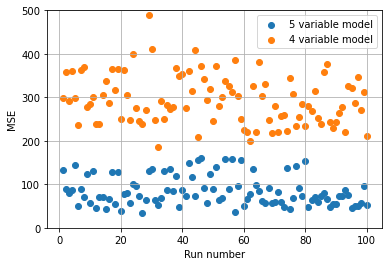

In [19]:
## plotting (visualizing) the data from the 5 variable model

import matplotlib.pyplot as plt

plt.scatter(results['run'],results['MSE5var'], label='5 variable model')
plt.scatter(results['run'], results['MSE4var'], label='4 variable model')
plt.xlabel('Run number')
plt.ylabel('MSE')
plt.ylim([0, 500])
plt.legend(loc='upper right')
plt.grid()

## The 5 variable model has much lower MSE values in the 100 runs. I would use this over the 4 variable model.